In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df_copy=pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.drop('CustomerID',axis=1,inplace=True)

In [8]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [9]:
df.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'}, inplace=True)
df

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [10]:
label_encoder=preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [11]:
df

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


Text(17.31944444444445, 0.5, 'Count')

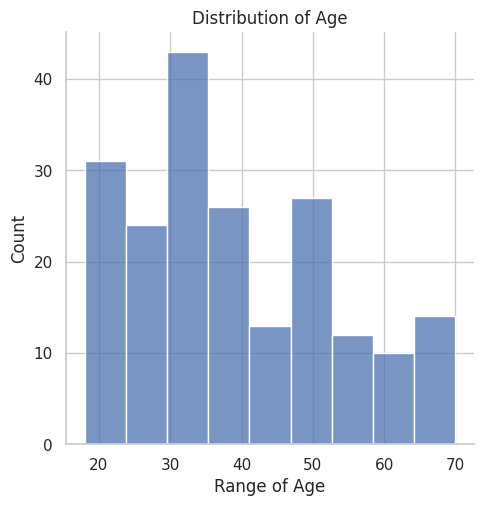

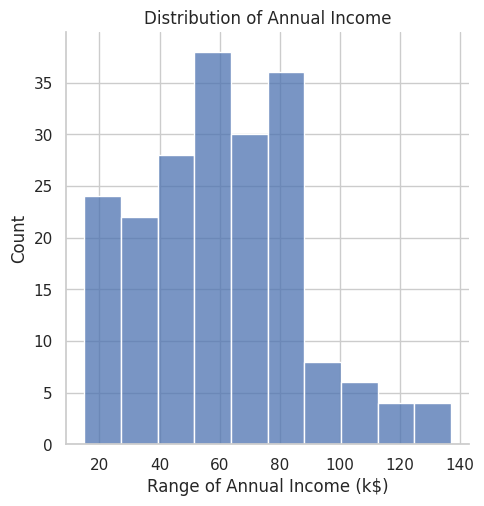

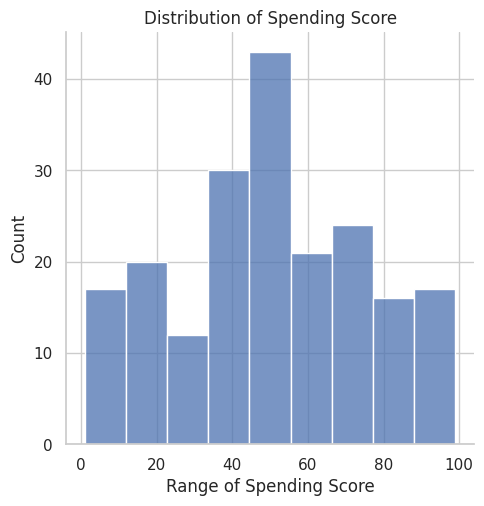

In [12]:
#Distribution of age
sns.set(style = 'whitegrid')
sns.displot(df['Age'])
plt.title('Distribution of Age', fontsize = 12)
plt.xlabel('Range of Age')
plt.ylabel('Count')

#Distribution of Annual Income
sns.set(style = 'whitegrid')
sns.displot(df['Annual Income'])
plt.title('Distribution of Annual Income', fontsize = 12)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

#Distribution of Spending Score
sns.set(style = 'whitegrid')
sns.displot(df['Spending Score'])
plt.title('Distribution of Spending Score', fontsize = 12)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')

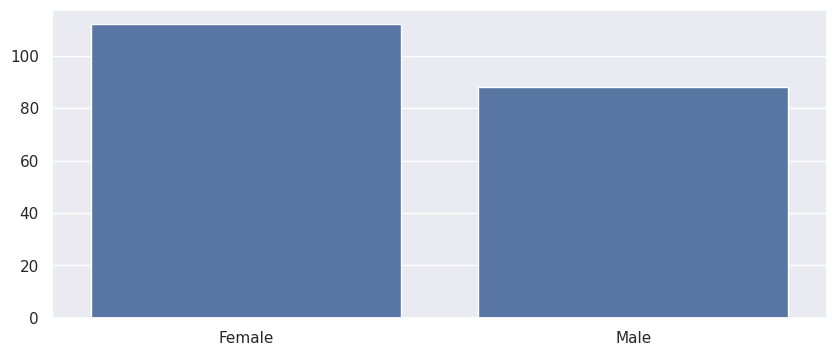

In [13]:
#Distribution of Gender
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=["Female", "Male"], y=genders.values)
plt.show()

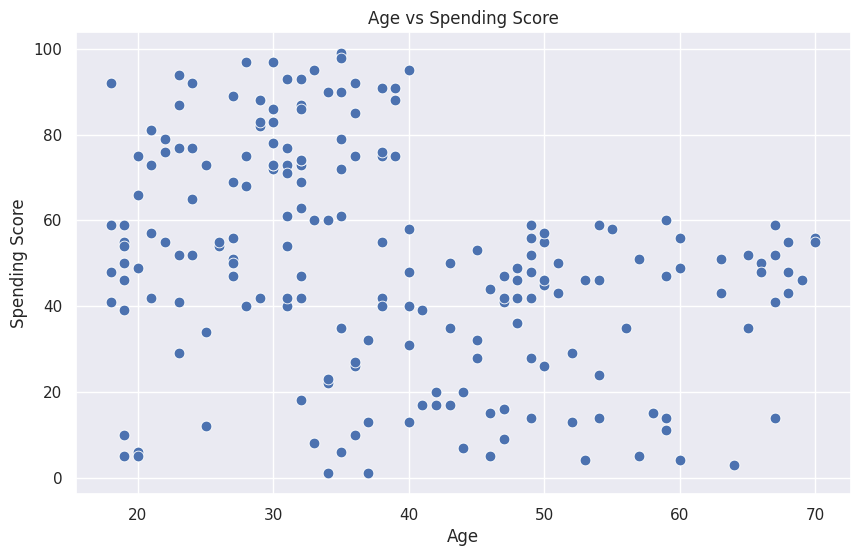

In [14]:
# Age vs Spending Score
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age' , y = 'Spending Score',data = df  ,s = 60)
plt.xlabel('Age'), plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.show()

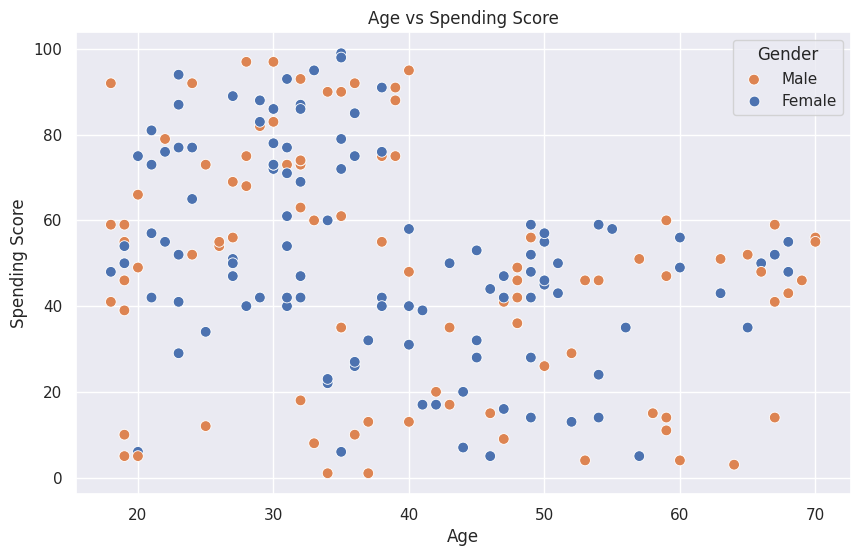

In [15]:
# Age vs Spending Score based on gender
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age' , y = 'Spending Score',hue="Gender", data = df  ,s = 60)
plt.xlabel('Age'), plt.ylabel('Spending Score')
plt.title('Age vs Spending Score based on Gender')
plt.title('Age vs Spending Score')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

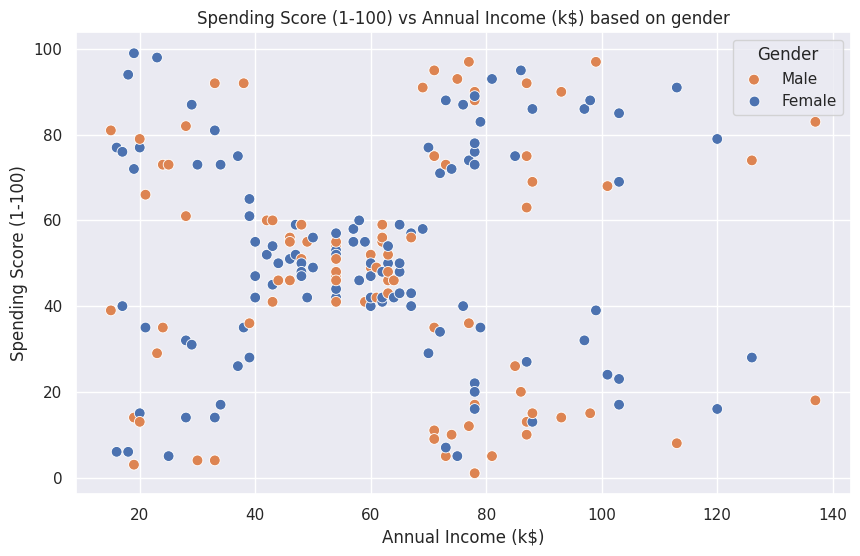

In [16]:
# Annual Income vs Spending Score based on gender
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income',y = 'Spending Score' , hue="Gender",data = df  ,s = 60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$) based on gender')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

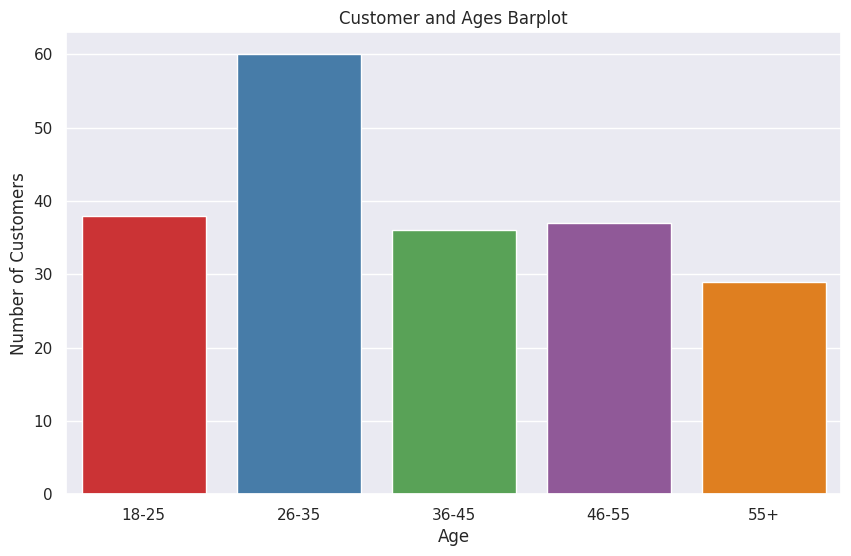

In [17]:
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55_above = df.Age[df.Age >= 56]

age = ["18-25","26-35","36-45","46-55","55+"]
age_count = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55_above.values)]
# colors = ['red', 'green', 'blue', 'yellow', 'brown']

plt.figure(figsize=(10,6))
sns.barplot(x=age, y=age_count, hue=age, palette='Set1', legend=False)
plt.title("Customer and Ages Barplot")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

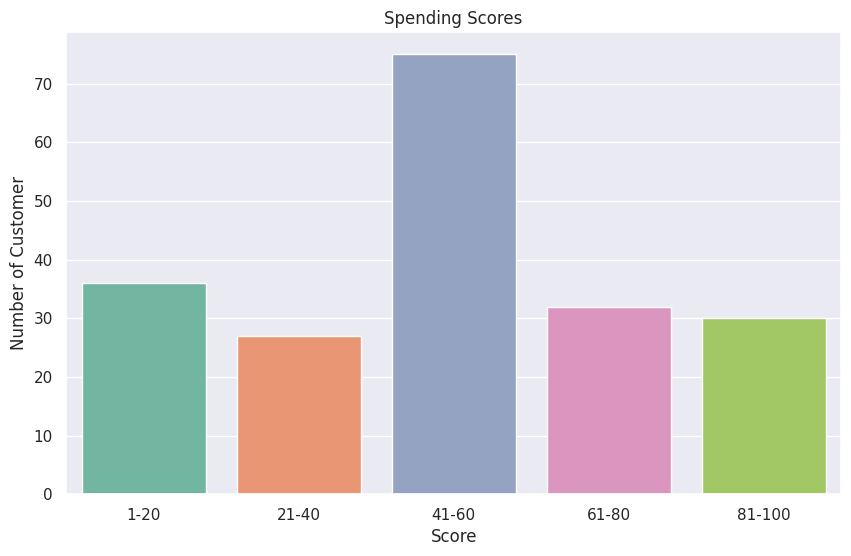

In [18]:
ss1_20 = df["Spending Score"][(df["Spending Score"] >= 1) & (df["Spending Score"] <= 20)]
ss21_40 = df["Spending Score"][(df["Spending Score"] >= 21) & (df["Spending Score"] <= 40)]
ss41_60 = df["Spending Score"][(df["Spending Score"] >= 41) & (df["Spending Score"] <= 60)]
ss61_80 = df["Spending Score"][(df["Spending Score"] >= 61) & (df["Spending Score"] <= 80)]
ss81_100 = df["Spending Score"][(df["Spending Score"] >= 81) & (df["Spending Score"] <= 100)]

score = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_count = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score, y=score_count, hue=score, palette="Set2", legend=False)
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer")
plt.show()

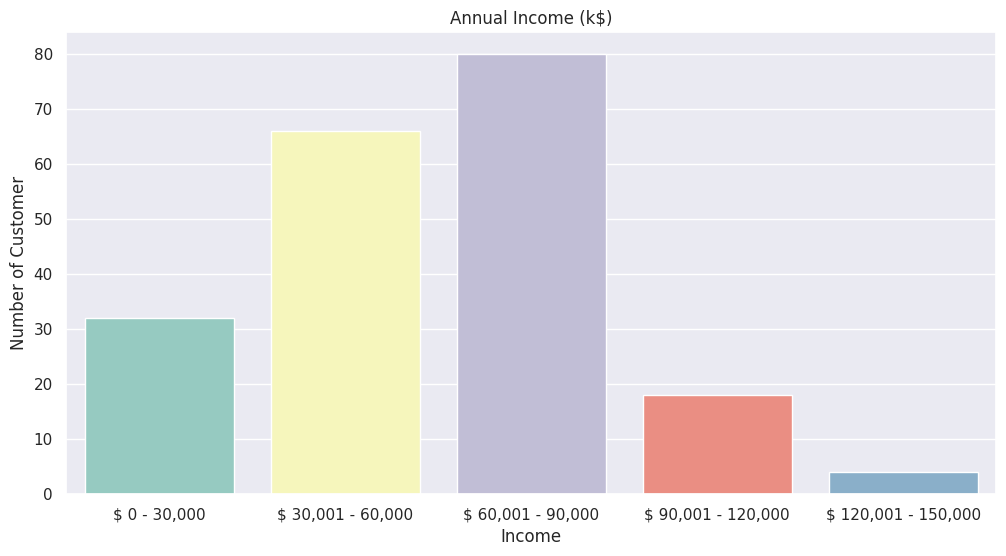

In [19]:
ai0_30 = df["Annual Income"][(df["Annual Income"] >= 0) & (df["Annual Income"] <= 30)]
ai31_60 = df["Annual Income"][(df["Annual Income"] >= 31) & (df["Annual Income"] <= 60)]
ai61_90 = df["Annual Income"][(df["Annual Income"] >= 61) & (df["Annual Income"] <= 90)]
ai91_120 = df["Annual Income"][(df["Annual Income"] >= 91) & (df["Annual Income"] <= 120)]
ai121_150 = df["Annual Income"][(df["Annual Income"] >= 121) & (df["Annual Income"] <= 150)]

income_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(12,6))
sns.barplot(x=income_x, y=income_y, hue=income_x, palette="Set3", legend=False)
plt.title("Annual Income (k$)")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# Gaussian Mixture Model Clustering

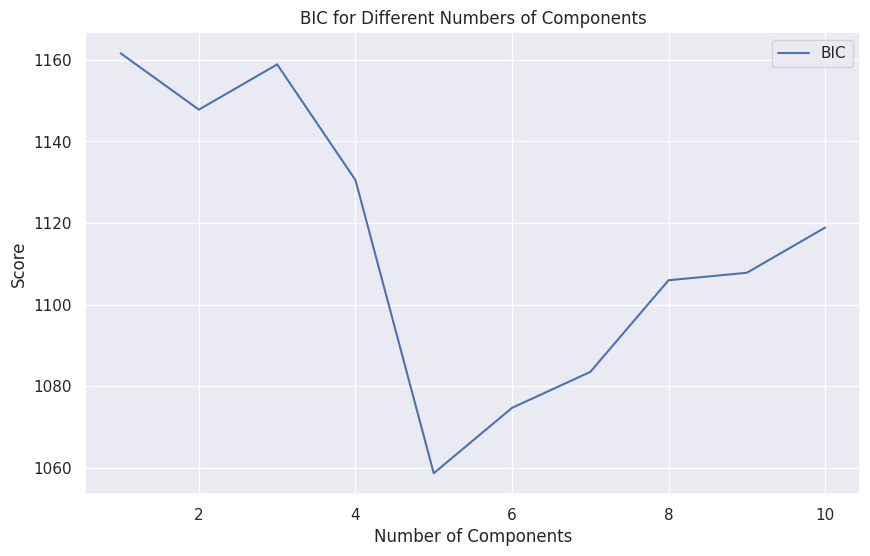

In [39]:
# Selecting features for clustering
X = df.iloc[:, [2, 3]].values  # Annual Income and Spending Score

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fitting GMM models with different numbers of components
n_components_range = range(1, 11)
bics = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled)) # Bayesian Information Criterion

# Plotting BIC values
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bics, label='BIC')
plt.title('BIC for Different Numbers of Components')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()
plt.grid(True)


In [40]:

# Gaussian Mixture Model clustering
#Expectation-Maximization (EM) Algorithm:

gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_scaled)

# Predicting cluster labels
cluster_labels = gmm.predict(X_scaled)

In [22]:
print(cluster_labels)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 0 4
 1 4 1 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


GMM_Annual_spending_silhouette_score:  0.5536892843811245


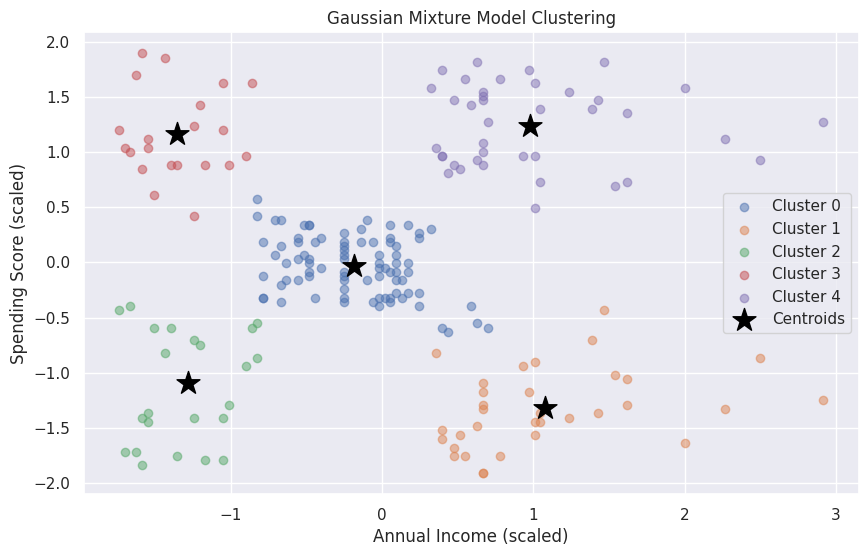

In [41]:

# Adding cluster labels to the dataset
df['Cluster'] = cluster_labels
score = silhouette_score(X_scaled, cluster_labels)
print("GMM_Annual_spending_silhouette_score: ", score )
# Visualizing the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(5):
    plt.scatter(
        X_scaled[df['Cluster'] == cluster_label, 0],
        X_scaled[df['Cluster'] == cluster_label, 1],
        label=f'Cluster {cluster_label}',
        alpha=0.5
    )

plt.scatter(
    gmm.means_[:, 0], gmm.means_[:, 1],
    marker='*', s=300, c='black', label='Centroids'
)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


In [24]:
df_copy["Cluster"] = cluster_labels
for i in range(5):
  cust=df_copy[df_copy["Cluster"]==i]
  print('Number of customer in ' + str(i) + ' group=', len(cust))
  print('They are -', cust["CustomerID"].values)

Number of customer in 0 group= 84
They are - [ 44  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 127 133 143 147 161]
Number of customer in 1 group= 33
They are - [125 129 131 135 137 139 141 145 149 151 153 155 157 159 163 165 167 169
 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
Number of customer in 2 group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
Number of customer in 3 group= 21
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42]
Number of customer in 4 group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]


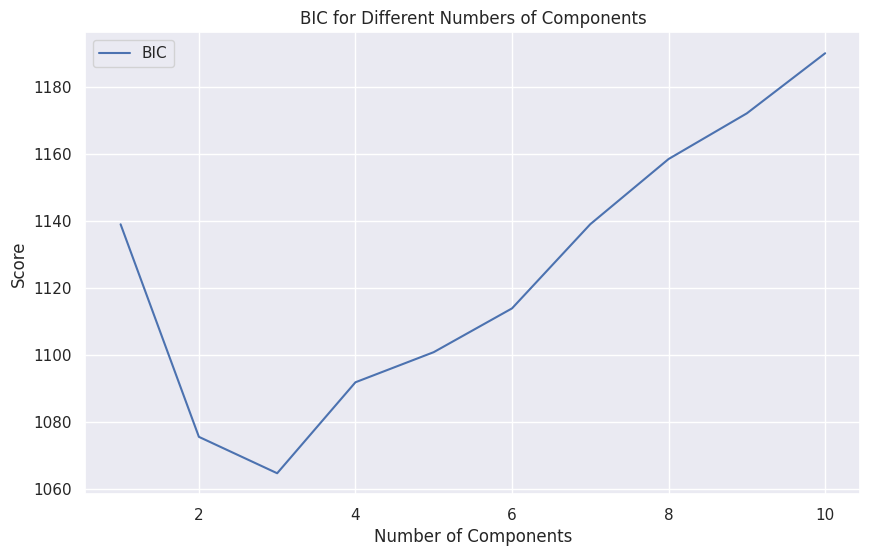

In [42]:
# Selecting features for clustering
X = df.iloc[:, [1, 3]].values  # Age and Spending Score

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fitting GMM models with different numbers of components
n_components_range = range(1, 11)
bics = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))

# Plotting BIC values
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bics, label='BIC')
plt.title('BIC for Different Numbers of Components')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


GMM_Age_spending_silhouette_score:  0.41342974107486774


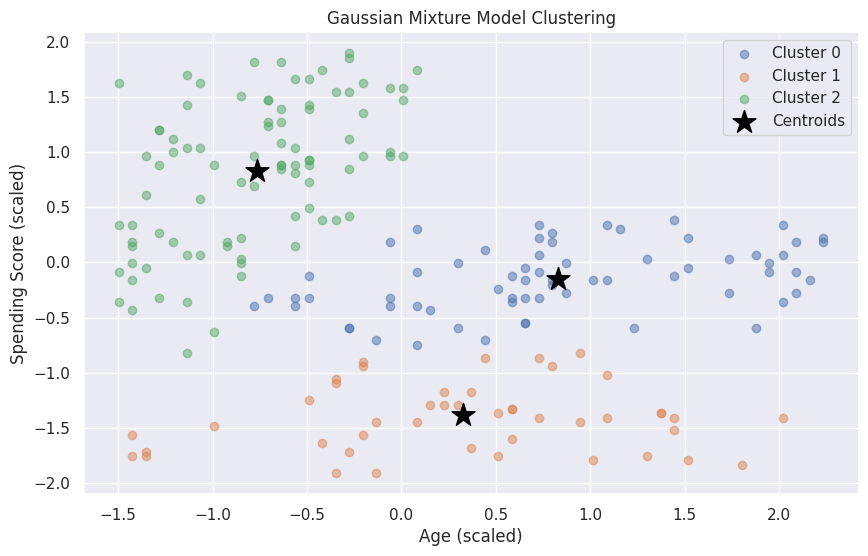

In [44]:
# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)

# Predicting cluster labels
cluster_labels = gmm.predict(X_scaled)

# Adding cluster labels to the dataset
df['Cluster'] = cluster_labels

score = silhouette_score(X_scaled, cluster_labels)
print("GMM_Age_spending_silhouette_score: ", score)
# Visualizing the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(3):
    plt.scatter(
        X_scaled[df['Cluster'] == cluster_label, 0],
        X_scaled[df['Cluster'] == cluster_label, 1],
        label=f'Cluster {cluster_label}',
        alpha=0.5
    )

plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='*', s=300, c='black', label='Centroids')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Age (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


In [27]:
df_copy["Cluster"] = cluster_labels
for i in range(3):
  cust=df_copy[df_copy["Cluster"]==i]
  print('Number of customer in ' + str(i) + ' group=', len(cust))
  print('They are -', cust["CustomerID"].values)

Number of customer in 0 group= 66
They are - [  5  17  21  27  29  41  43  47  49  50  51  54  55  56  57  58  60  61
  63  64  65  67  68  70  71  72  73  74  75  77  78  80  81  82  83  84
  86  87  90  91  93  94  95  97  99 102 103 105 107 108 109 110 111 113
 117 118 119 120 122 123 127 143 147 161 181 185]
Number of customer in 1 group= 45
They are - [  3   7   9  11  13  15  19  23  25  31  33  35  37  39  45 129 131 135
 137 139 141 145 149 151 153 155 157 159 163 165 167 169 171 173 175 177
 179 183 187 189 191 193 195 197 199]
Number of customer in 2 group= 89
They are - [  1   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  52  53  59  62  66  69  76  79  85  88  89
  92  96  98 100 101 104 106 112 114 115 116 121 124 125 126 128 130 132
 133 134 136 138 140 142 144 146 148 150 152 154 156 158 160 162 164 166
 168 170 172 174 176 178 180 182 184 186 188 190 192 194 196 198 200]


#K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

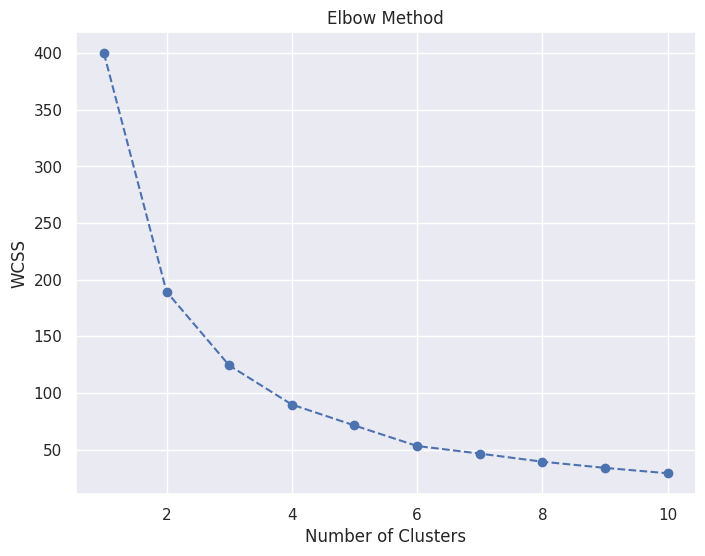

In [46]:
# Selecting features for clustering
X = df.iloc[:, [ 1, 3]].values  # Age, Spending Score

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means_Age_spending_silhouette_score:  0.44754858878462783


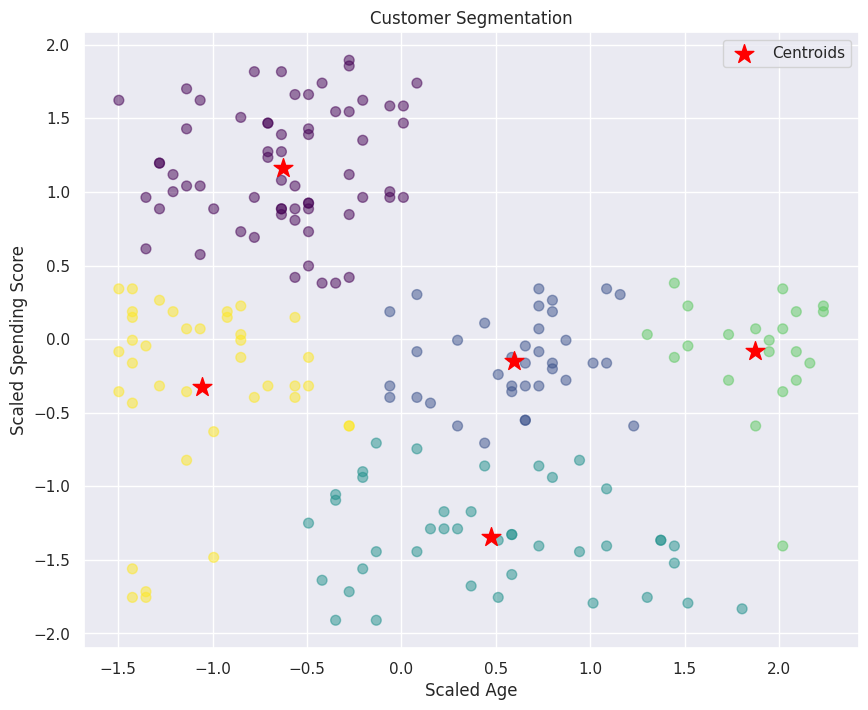

In [47]:
# Applying K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, clusters)
print("K-Means_Age_spending_silhouette_score: ", score)

# Adding cluster labels to the dataset
df['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

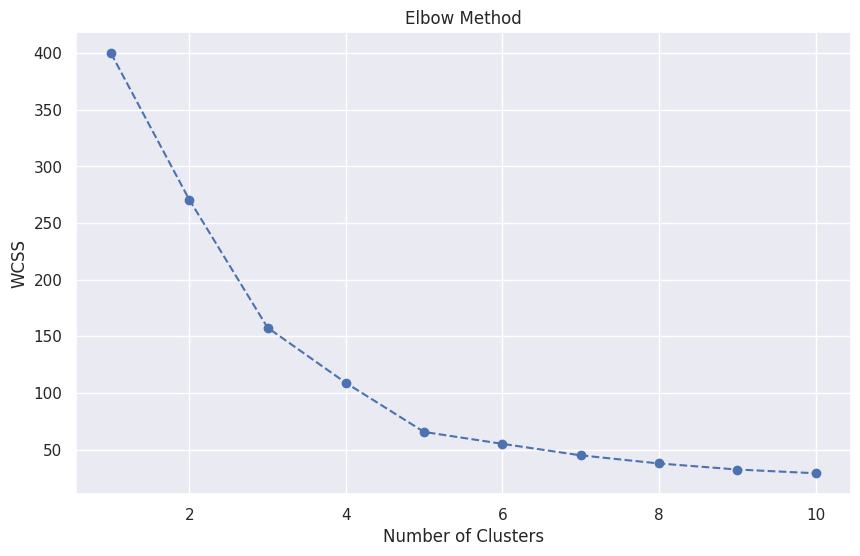

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means_Annual_spending_silhouette_score:  0.5546571631111091


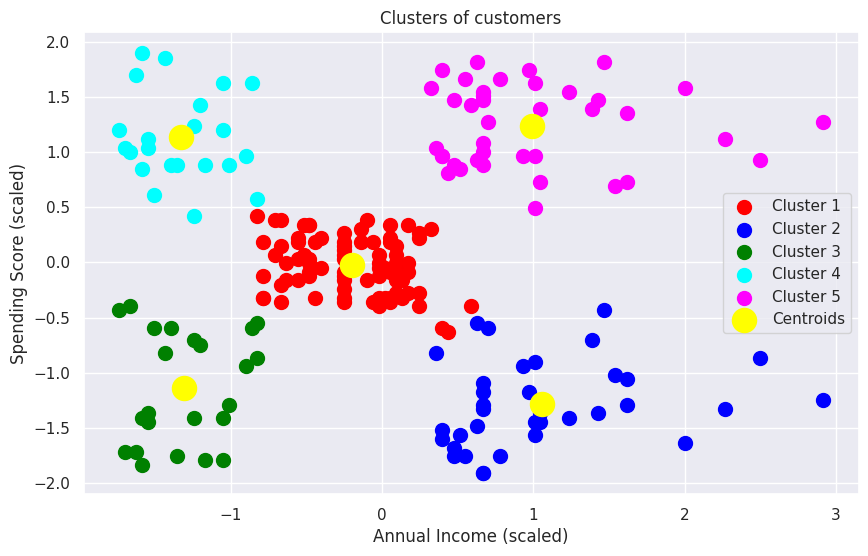

In [48]:
# Selecting features for clustering
X = df.iloc[:, [2, 3]].values  # Age and Spending Score

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow method, let's choose 5 clusters

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, y_kmeans)
print("K-Means_Annual_spending_silhouette_score: ", score)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


# DBSCAN

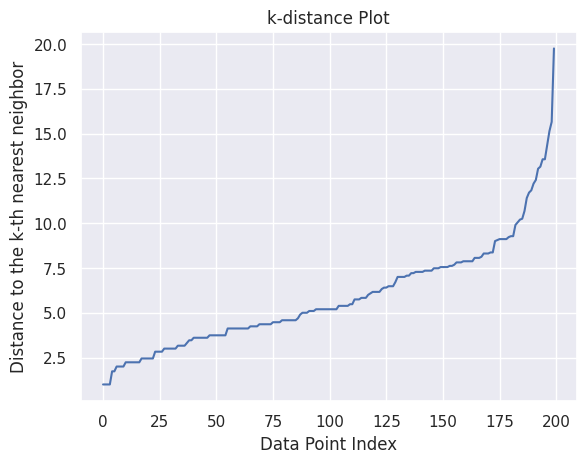

In [51]:
#Density Based Spacial Clustering of Applications with Noise(DBSCAN)
#The DBSCAN depends on values Epsilon and Max_sample for clustering, so here i do calclulate the distance matrix and sort


# Select relevant features for clustering
X = df[['Age', 'Annual Income', 'Spending Score']]

# Calculate the distance matrix
nbrs = NearestNeighbors(n_neighbors=2).fit(X)
distances, _ = nbrs.kneighbors(X)


# Sort the distances and plot the k-distance graph
distances = np.sort(distances, axis=0)
plt.plot(distances[:, 1])
plt.xlabel("Data Point Index")
plt.ylabel("Distance to the k-th nearest neighbor")
plt.title("k-distance Plot")
plt.show()

DBSCAN_Annual_spending_silhouette_score:  0.19707521745228654


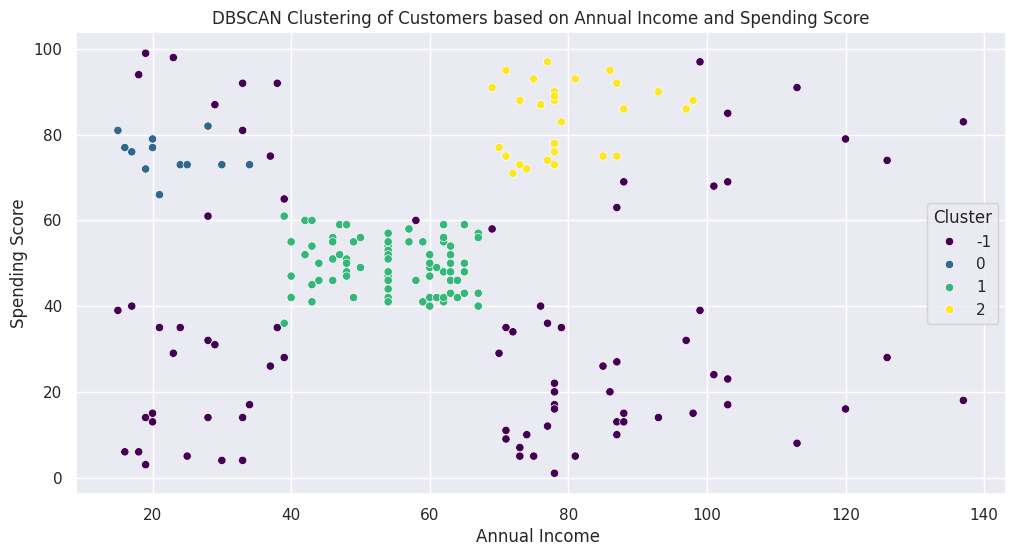

In [52]:
# Initialize DBSCAN model
dbscan = DBSCAN(eps=10, min_samples=6)

# Fit the model
dbscan.fit(X)

# Predict the cluster labels
clusters = dbscan.labels_

score = silhouette_score(X, clusters)
print("DBSCAN_Annual_spending_silhouette_score: ", score)

# Add cluster labels to the original data
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Annual Income', y='Spending Score', hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering of Customers based on Annual Income and Spending Score')
plt.xlabel('Annual Income ')
plt.ylabel('Spending Score')
plt.show()

#Agglomerative Hierarchical Clustering

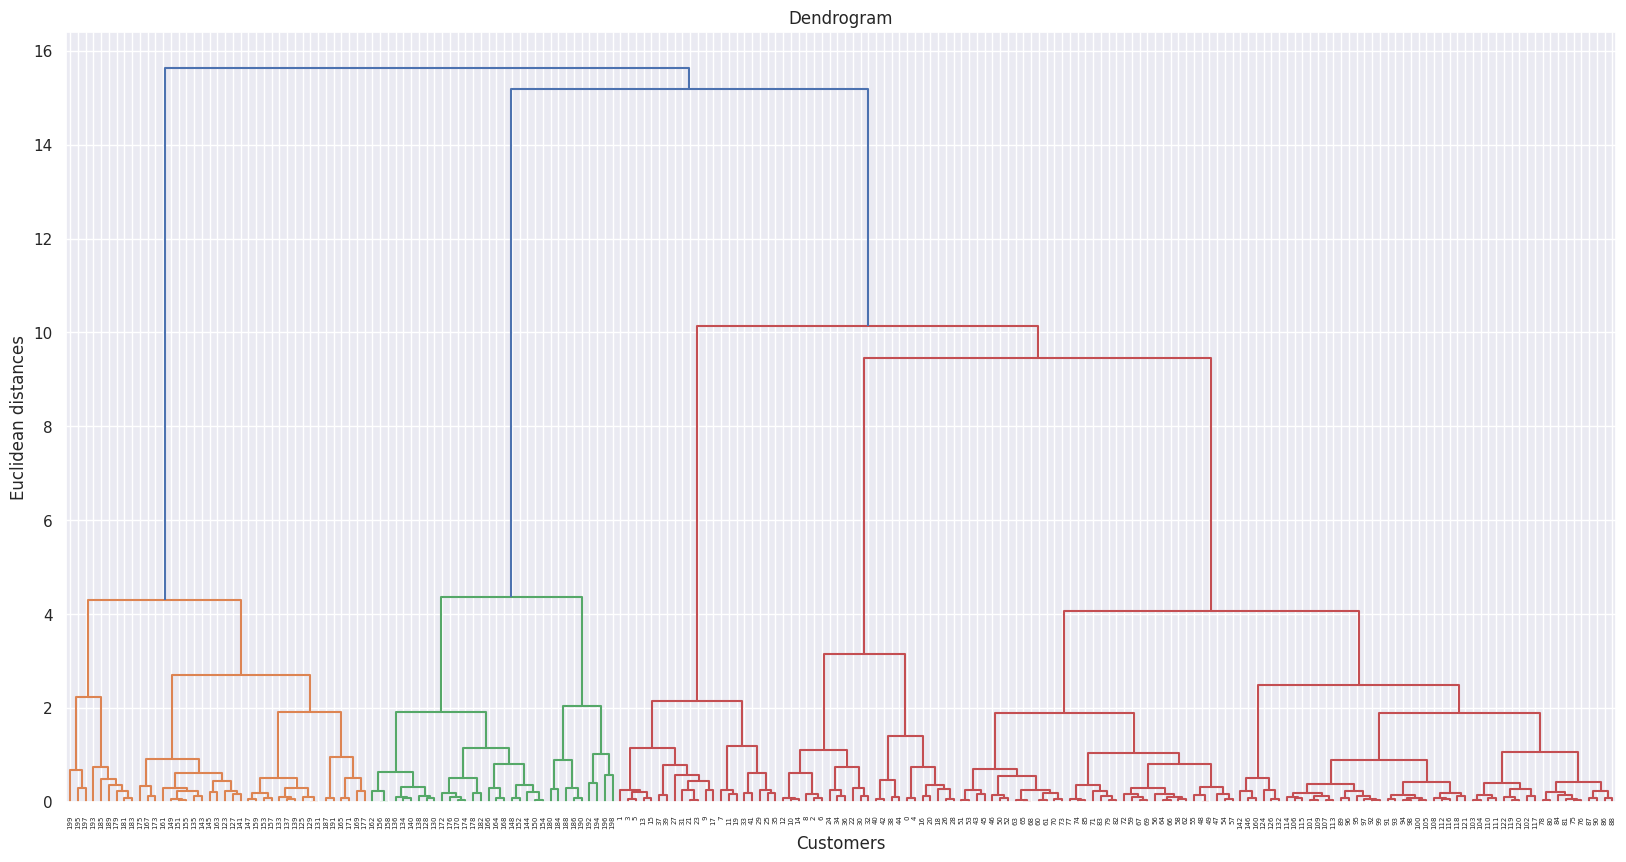

In [34]:
# Creating the AgglomerativeClustering Model
model = AgglomerativeClustering(metric='euclidean', linkage='ward')
model.fit(X_scaled)

# Plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [35]:
# Initialize Agglomerative Clustering model
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clusters = cluster.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters
# You can also inspect the characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean()
cluster_summary

,Gender,Age,Annual Income,Spending Score
Cluster,,,,
0,0.562500,41.000000,89.406250,15.593750
1,0.461538,32.692308,86.538462,82.128205
2,0.400000,42.482353,55.811765,49.129412
3,0.428571,25.333333,25.095238,80.047619
4,0.391304,45.217391,26.304348,20.913043


Agglomerative_Annual_spending_silhouette_score:  0.5538089226688662


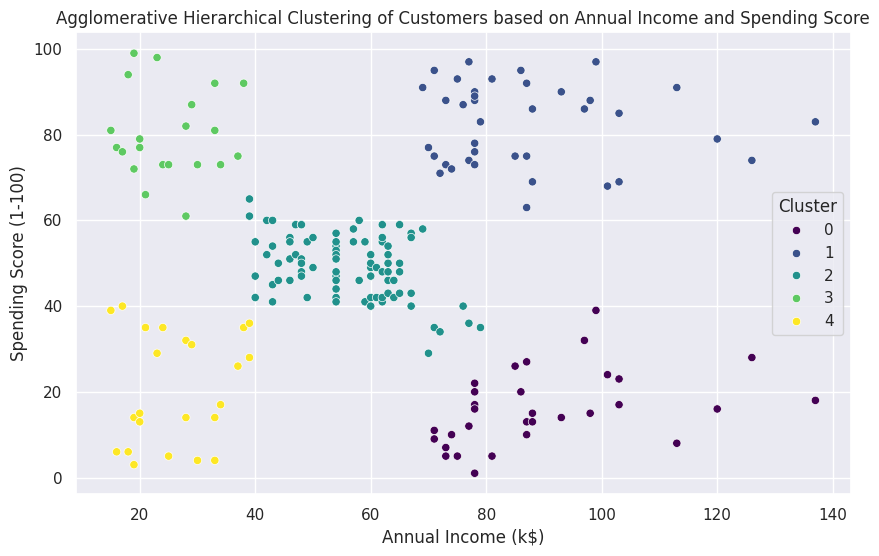

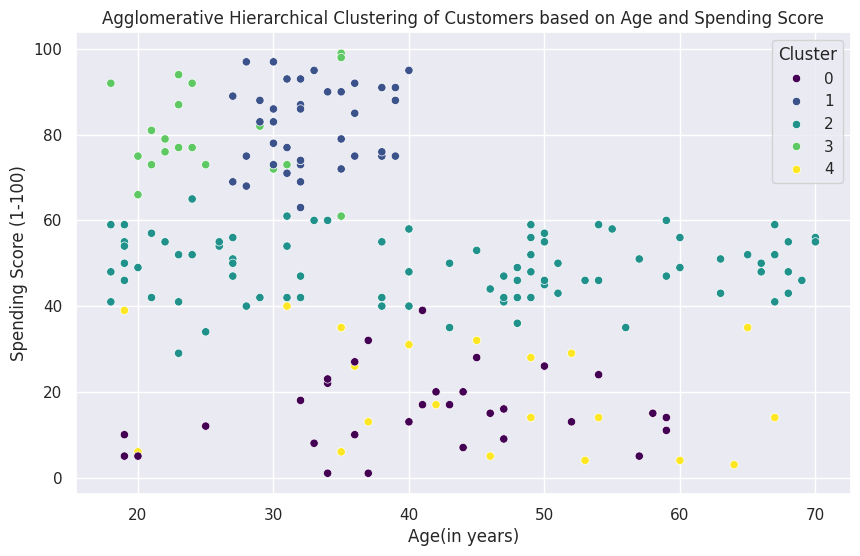

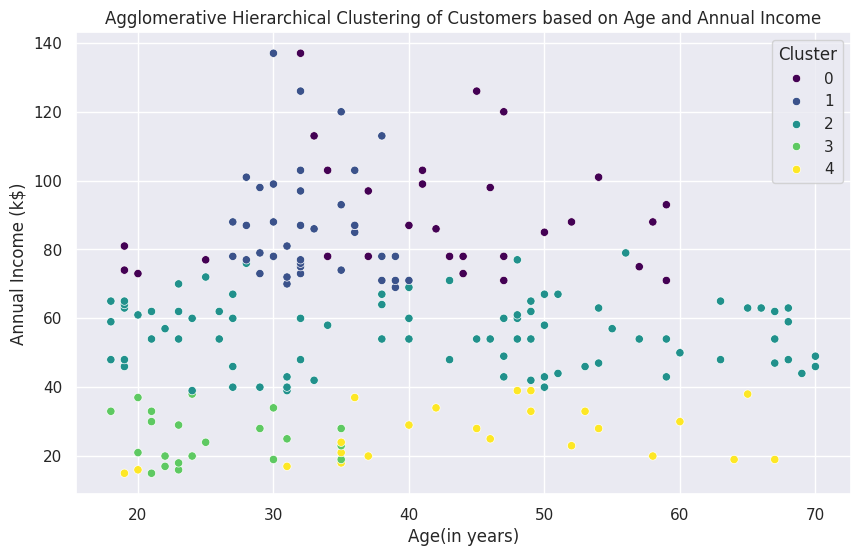

In [50]:
# Initialize Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Fit the model
clusters = agg_clustering.fit_predict(X_scaled)

# Add cluster labels to the original data
df['Cluster'] = clusters


score = silhouette_score(X_scaled, clusters)
print("Agglomerative_Annual_spending_silhouette_score: ", score)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income', y='Spending Score', hue='Cluster', palette='viridis')
plt.title('Agglomerative Hierarchical Clustering of Customers based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score', hue='Cluster', palette='viridis')
plt.title('Agglomerative Hierarchical Clustering of Customers based on Age and Spending Score')
plt.xlabel('Age(in years)')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Annual Income', hue='Cluster', palette='viridis')
plt.title('Agglomerative Hierarchical Clustering of Customers based on Age and Annual Income')
plt.xlabel('Age(in years)')
plt.ylabel('Annual Income (k$)')
plt.show()

Clustering Results:
Hierarchical (ward): Silhouette Score = 0.5538089226688662
Hierarchical (complete): Silhouette Score = 0.5531118656926701
Hierarchical (average): Silhouette Score = 0.4794263081846086
Hierarchical (single): Silhouette Score = 0.2758004412314313


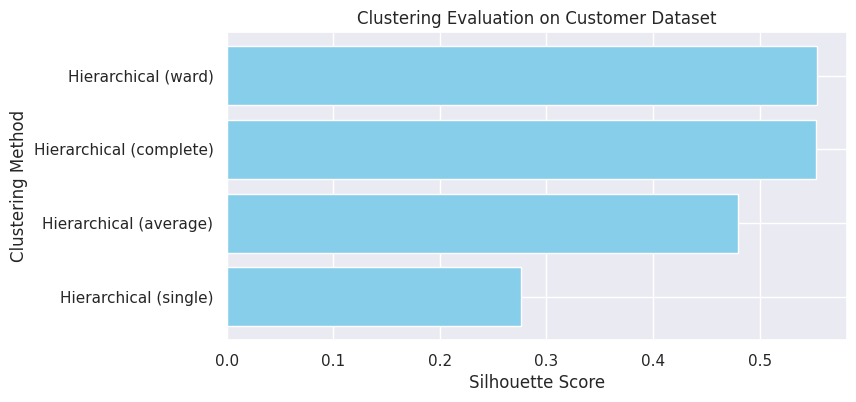

In [37]:
linkage_methods = ['ward', 'complete', 'average', 'single']
results = []
# Initializing Agglomerative Clustering model for all the linkage methods
for linkage in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=5, linkage=linkage)
    hierarchical_labels = hierarchical.fit_predict(X_scaled)
    hierarchical_score = silhouette_score(X_scaled, hierarchical_labels)
    results.append((f'Hierarchical ({linkage})', hierarchical_score))
print("Clustering Results:")
for method, score in results:
    print(f"{method}: Silhouette Score = {score}")

# Visualize results
plt.figure(figsize=(8, 4))
methods = [method for method, _ in results]
scores = [score for _, score in results]
plt.barh(methods, scores, color='skyblue')
plt.xlabel('Silhouette Score')
plt.ylabel('Clustering Method')
plt.title('Clustering Evaluation on Customer Dataset')
plt.gca().invert_yaxis()
plt.show()

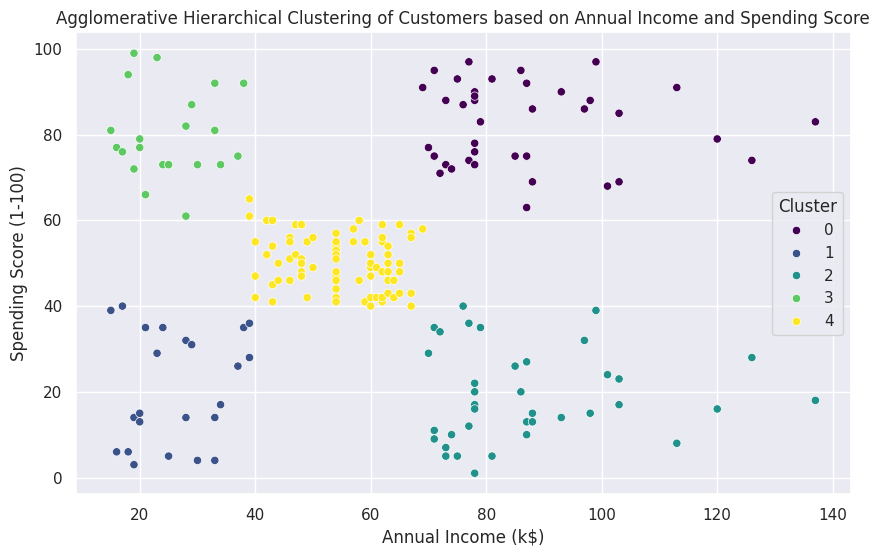

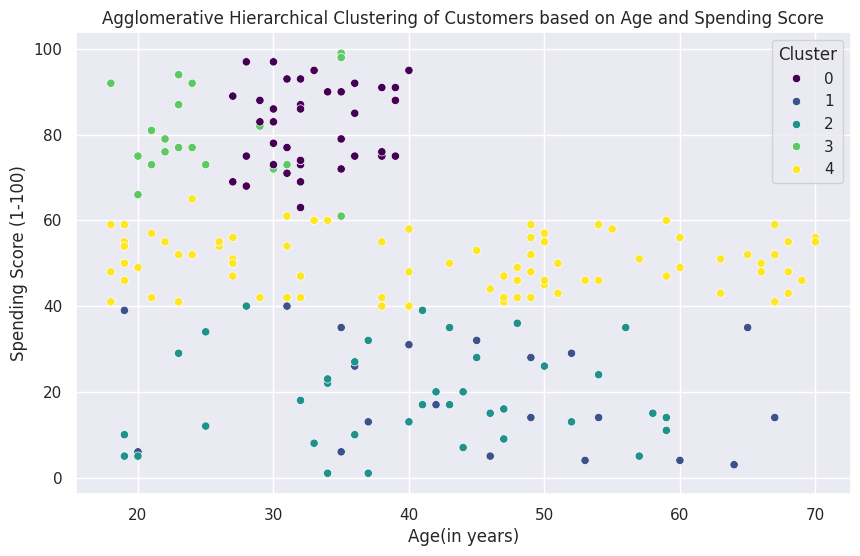

In [38]:
# Initialize Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='complete')

# Fit the model
clusters = agg_clustering.fit_predict(X_scaled)

# Add cluster labels to the original data
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income', y='Spending Score', hue='Cluster', palette='viridis')
plt.title('Agglomerative Hierarchical Clustering of Customers based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score', hue='Cluster', palette='viridis')
plt.title('Agglomerative Hierarchical Clustering of Customers based on Age and Spending Score')
plt.xlabel('Age(in years)')
plt.ylabel('Spending Score (1-100)')
plt.show()